## First we look at the whole dataset, this includes all building types

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_27434/1064692252.py:8: DtypeWarning: Columns (57,850) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First 5 rows of the dataset:
   bldg_id  metadata_index  upgrade    weight   in.sqft  calc.weighted.sqft  \
0   204657            1754        0  4.088175   17500.0        7.154306e+04   
1   204749            1755        0  5.759960  750000.0        4.319970e+06   
2   204942            1756        0  7.402800  350000.0        2.590980e+06   
3   205046            1757        0  5.759960  350000.0        2.015986e+06   
4   205054            1758        0  4.088175   75000.0        3.066131e+05   

  in.upgrade_name  applicability in.building_america_climate_zone  \
0        Baseline           True                             Cold   
1        Baseline           True                      Mixed-Humid   
2        Baseline           True                             Cold   
3        Baseline           True                      Mixed-Humid   
4        Baseline           True                      Mixed-Humid   

  in.cambium_grid_region  ...  \
0                  NYSTc  ...   
1              

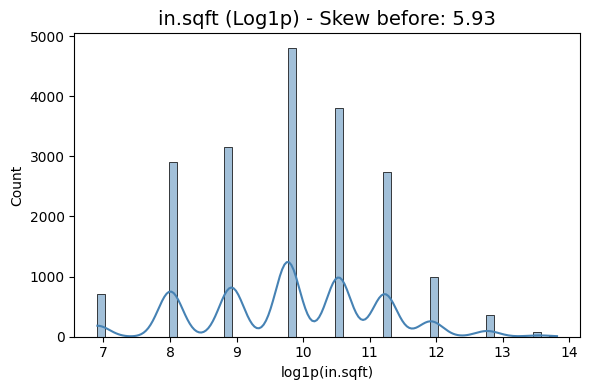

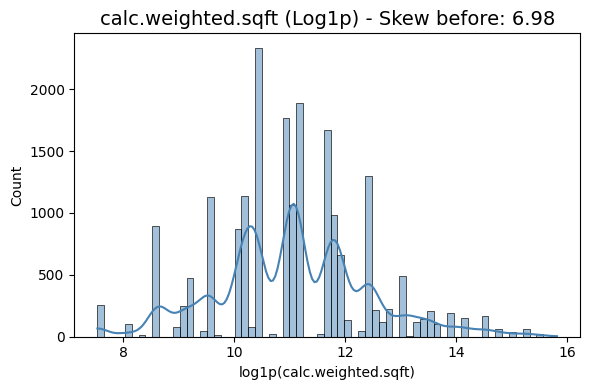

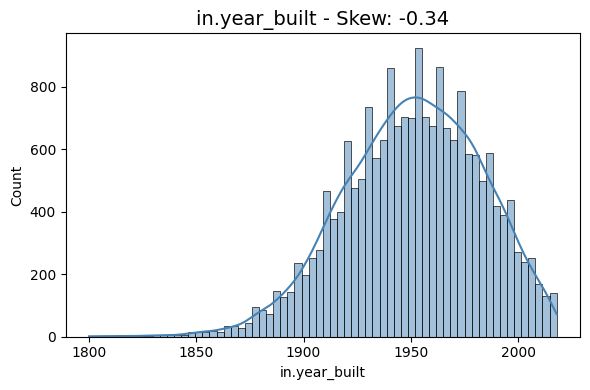

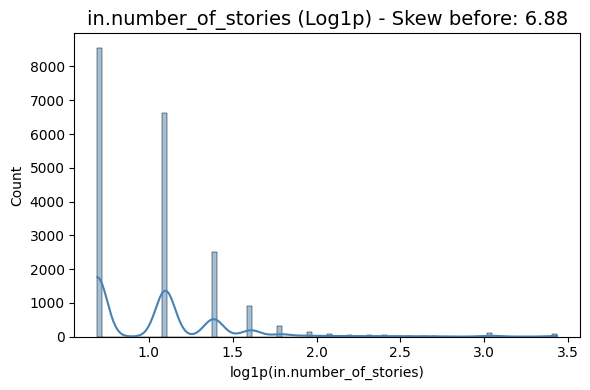

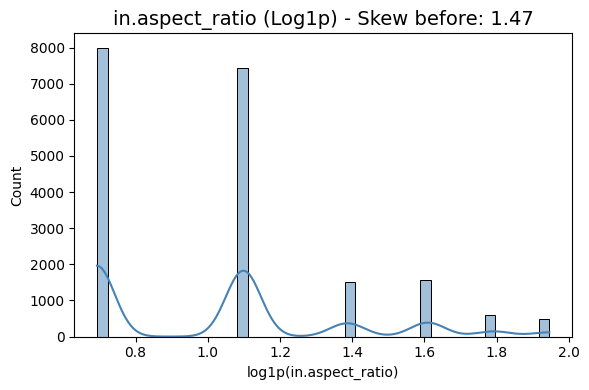

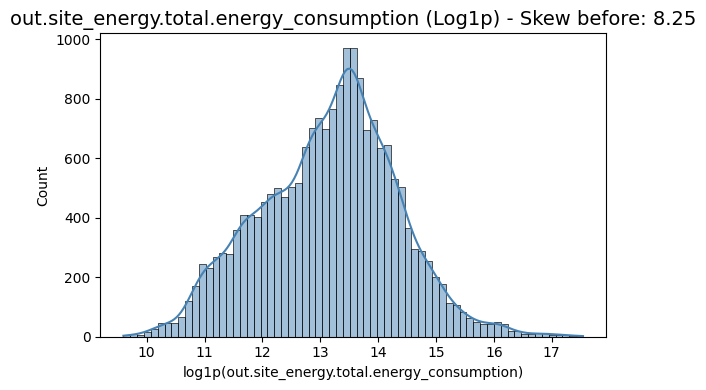

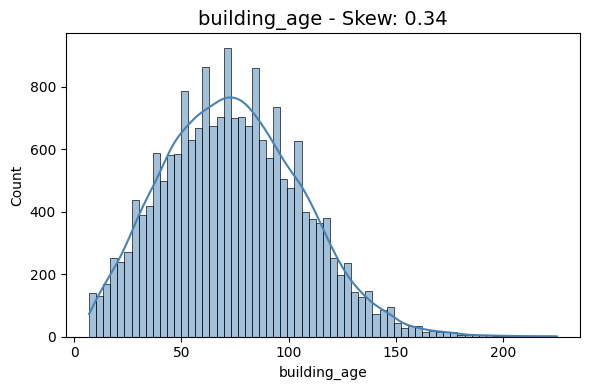

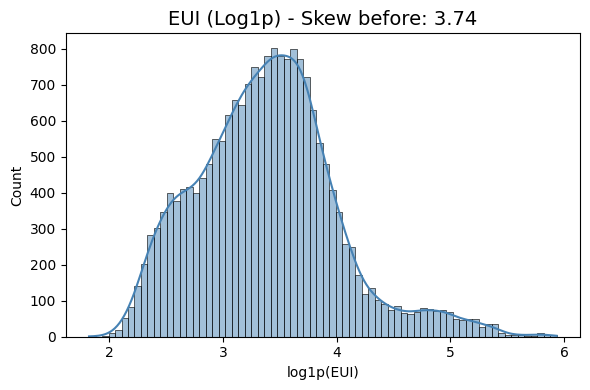


Correlation Matrix:
                                           in.sqft  calc.weighted.sqft  \
in.sqft                                   1.000000            0.931374   
calc.weighted.sqft                        0.931374            1.000000   
in.year_built                             0.039688            0.062579   
in.number_of_stories                      0.435597            0.476706   
in.aspect_ratio                           0.029046            0.036314   
out.site_energy.total.energy_consumption  0.877966            0.848744   
building_age                             -0.039688           -0.062579   
EUI                                      -0.194181           -0.146692   

                                          in.year_built  in.number_of_stories  \
in.sqft                                        0.039688              0.435597   
calc.weighted.sqft                             0.062579              0.476706   
in.year_built                                  1.000000             -

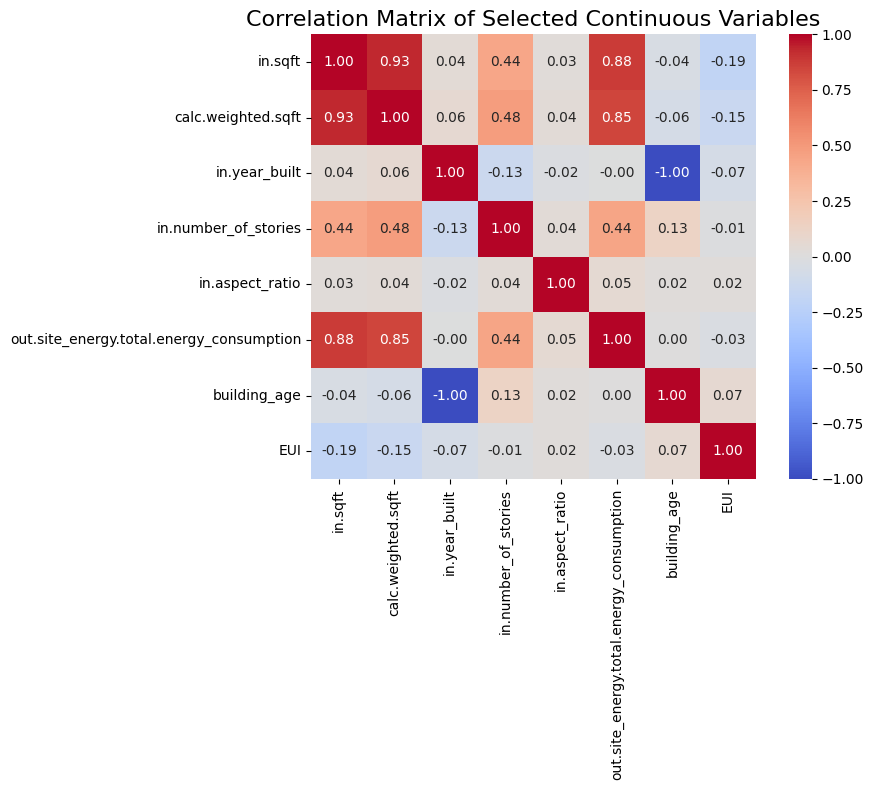

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
file_path = '/Users/georgepaul/Desktop/Research Project/Data Ideas/ComStock/Data/NY_baseline_metadata_and_annual_results (1).csv'
df = pd.read_csv(file_path)

# 2. Inspect initial rows
print("First 5 rows of the dataset:")
print(df.head())

# 3. Define continuous columns of interest
# Adjust as needed if names differ in your dataset
continuous_vars = [
    'in.sqft',
    'calc.weighted.sqft',
    'in.year_built',
    'in.number_of_stories',
    'in.aspect_ratio',
    'out.site_energy.total.energy_consumption'
]

# Keep only the columns that actually exist in df
continuous_vars = [col for col in continuous_vars if col in df.columns]

# 4. Compute building_age (optional) if year_built exists
if 'in.year_built' in continuous_vars:
    current_year = pd.to_datetime("today").year
    df['building_age'] = current_year - df['in.year_built']
    continuous_vars.append('building_age')

# 5. Compute EUI (kWh/ft²) if both total consumption and in.sqft are available
if 'out.site_energy.total.energy_consumption' in df.columns and 'in.sqft' in df.columns:
    df['EUI'] = df['out.site_energy.total.energy_consumption'] / df['in.sqft']
    continuous_vars.append('EUI')
else:
    print("Cannot compute EUI: required columns missing.")

# 6. Drop any duplicates in continuous_vars
continuous_vars = list(dict.fromkeys(continuous_vars))

# 7. Summary statistics for the chosen continuous variables
print("\nSummary Statistics for Selected Continuous Variables:")
print(df[continuous_vars].describe())

# 8. Plot histograms with Freedman–Diaconis bins and log transform for highly skewed, positive data
for col in continuous_vars:
    data = df[col].dropna()
    if data.empty:
        continue

    # Calculate skewness
    skew_val = data.skew()

    # Create figure
    plt.figure(figsize=(6,4))

    # Check if data is strictly positive and skew is large
    if (data > 0).all() and (abs(skew_val) > 1):
        # Apply log1p transform to reduce skew
        transformed = np.log1p(data)
        sns.histplot(transformed, bins='fd', kde=True, color='steelblue')
        plt.title(f'{col} (Log1p) - Skew before: {skew_val:.2f}', fontsize=14)
        plt.xlabel(f'log1p({col})')
    else:
        # No transform; just Freedman–Diaconis binning
        sns.histplot(data, bins='fd', kde=True, color='steelblue')
        plt.title(f'{col} - Skew: {skew_val:.2f}', fontsize=14)
        plt.xlabel(col)

    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 9. Correlation Matrix for the selected continuous variables
print("\nCorrelation Matrix:")
corr_matrix = df[continuous_vars].corr()

# Print correlation matrix numerically
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix of Selected Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_27434/1300122411.py:8: DtypeWarning: Columns (57,850) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


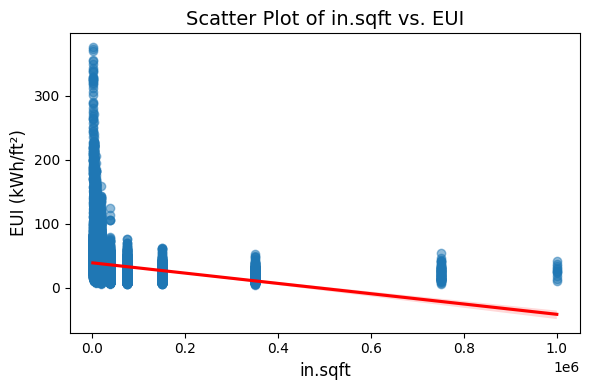

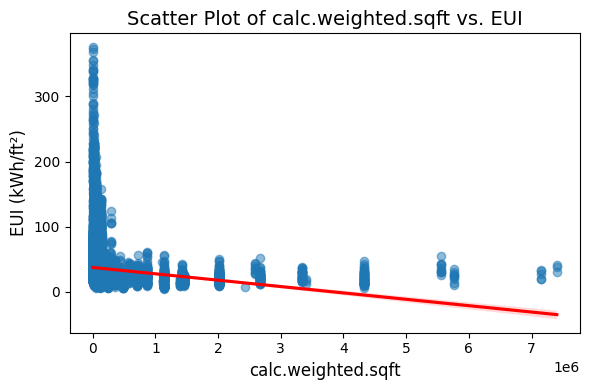

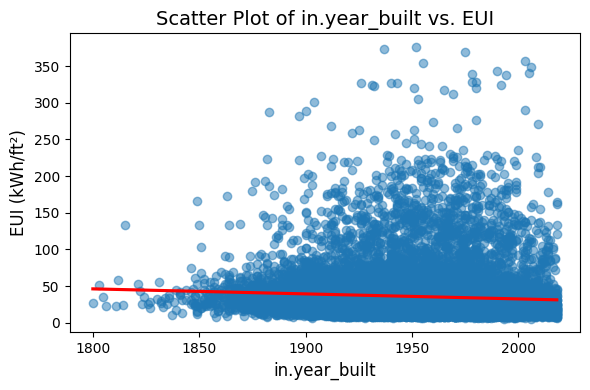

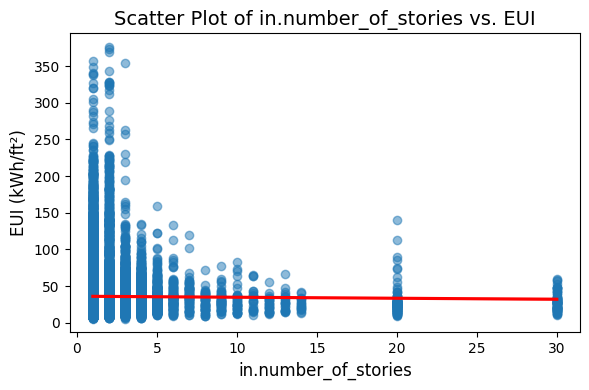

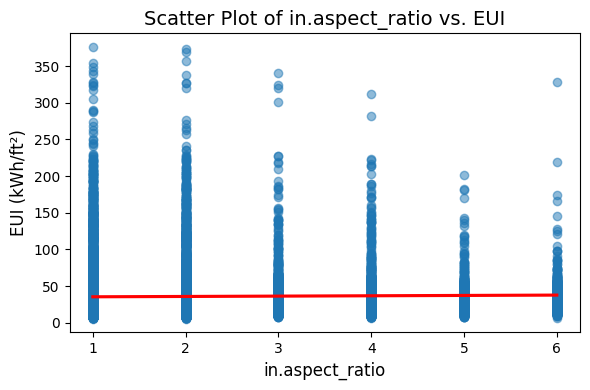

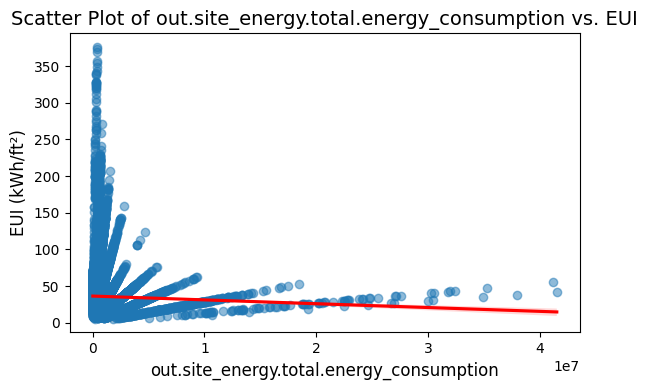

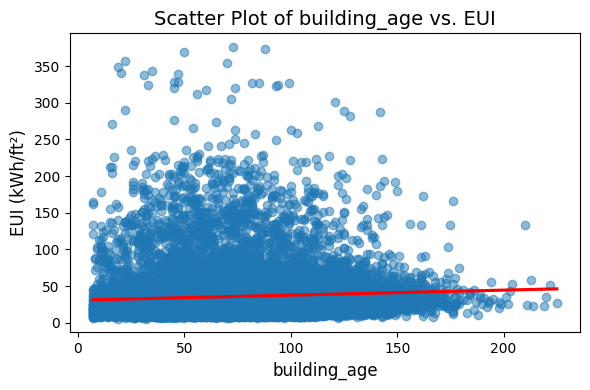

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust file path if necessary)
file_path = '/Users/georgepaul/Desktop/Research Project/Data Ideas/ComStock/Data/NY_baseline_metadata_and_annual_results (1).csv'
df = pd.read_csv(file_path)

# Define the continuous variables of interest
continuous_vars = [
    'in.sqft',
    'calc.weighted.sqft',
    'in.year_built',
    'in.number_of_stories',
    'in.aspect_ratio',
    'out.site_energy.total.energy_consumption'
]

# Filter continuous_vars to only include those that exist in the dataframe
continuous_vars = [col for col in continuous_vars if col in df.columns]

# Create building_age if 'in.year_built' exists
if 'in.year_built' in continuous_vars:
    current_year = pd.to_datetime("today").year
    df['building_age'] = current_year - df['in.year_built']
    continuous_vars.append('building_age')

# Compute EUI (kWh/ft²) if both energy consumption and in.sqft are available
if 'out.site_energy.total.energy_consumption' in df.columns and 'in.sqft' in df.columns:
    df['EUI'] = df['out.site_energy.total.energy_consumption'] / df['in.sqft']
    continuous_vars.append('EUI')
else:
    print("Required columns for computing EUI are missing.")

# Remove duplicate variable names (if any)
continuous_vars = list(dict.fromkeys(continuous_vars))

# List of predictors to plot vs. EUI (exclude EUI itself)
predictor_vars = [var for var in continuous_vars if var != 'EUI']

# Generate scatter plots with regression lines for each predictor vs. EUI
for var in predictor_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='EUI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of {var} vs. EUI', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('EUI (kWh/ft²)', fontsize=12)
    plt.tight_layout()
    plt.show()

## Next I ensure the only building type is small, medium, and large office

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_27434/1802780531.py:8: DtypeWarning: Columns (57,850) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Filtered dataset shape: (3711, 1056)

Summary Statistics for Selected Continuous Variables (Office Buildings):
              in.sqft  calc.weighted.sqft  in.year_built  \
count     3711.000000        3.711000e+03    3711.000000   
mean     47983.292913        3.119278e+05    1950.210455   
std     128668.609387        7.418340e+05      34.126476   
min       1000.000000        8.726058e+03    1827.000000   
25%       3000.000000        2.617817e+04    1928.000000   
50%       7500.000000        6.544544e+04    1953.000000   
75%      17500.000000        1.527060e+05    1975.000000   
max    1000000.000000        5.759960e+06    2018.000000   

       in.number_of_stories  in.aspect_ratio  \
count           3711.000000      3711.000000   
mean               3.450013         1.904877   
std                4.795508         1.145414   
min                1.000000         1.000000   
25%                2.000000         1.000000   
50%                2.000000         2.000000   
75%         

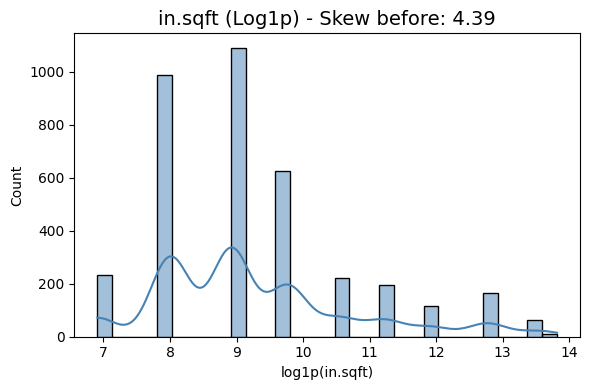

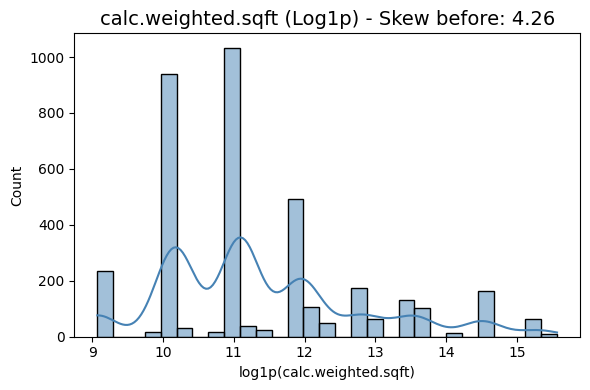

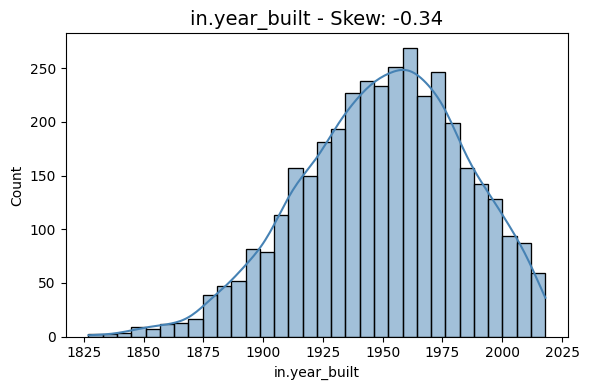

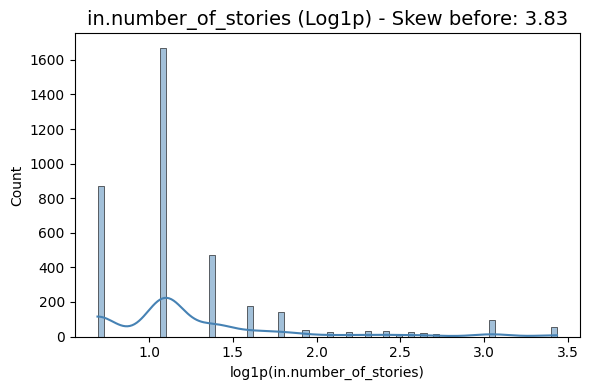

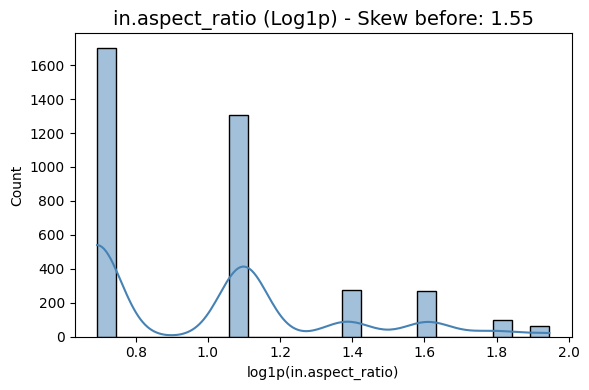

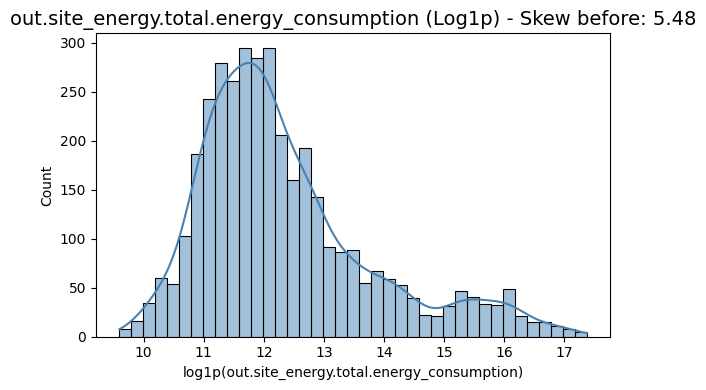

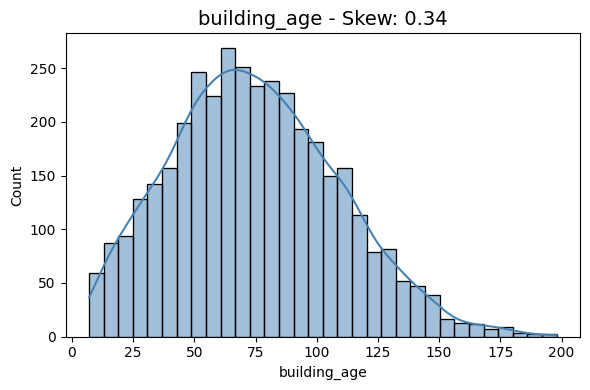

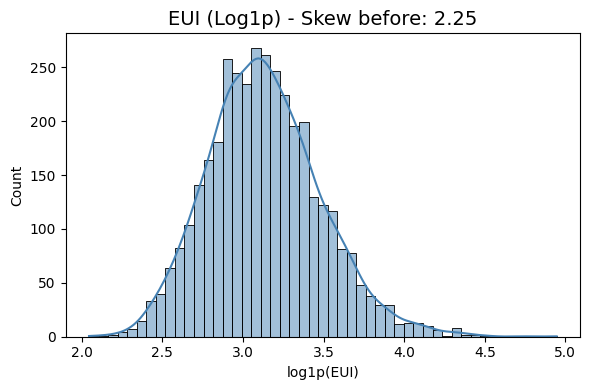


Correlation Matrix (Office Buildings):
                                           in.sqft  calc.weighted.sqft  \
in.sqft                                   1.000000            0.996502   
calc.weighted.sqft                        0.996502            1.000000   
in.year_built                            -0.104797           -0.100529   
in.number_of_stories                      0.625962            0.617915   
in.aspect_ratio                           0.058075            0.060463   
out.site_energy.total.energy_consumption  0.922404            0.916459   
building_age                              0.104797            0.100529   
EUI                                      -0.072145           -0.091896   

                                          in.year_built  in.number_of_stories  \
in.sqft                                       -0.104797              0.625962   
calc.weighted.sqft                            -0.100529              0.617915   
in.year_built                                  1.0

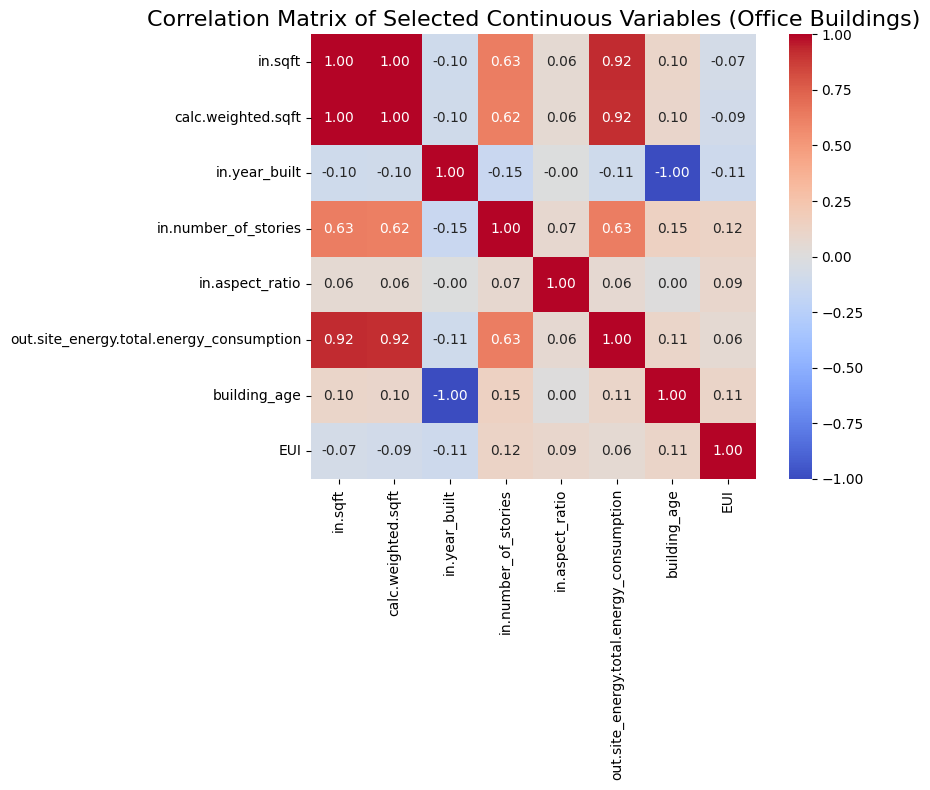

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
file_path = '/Users/georgepaul/Desktop/Research Project/Data Ideas/ComStock/Data/NY_baseline_metadata_and_annual_results (1).csv'
df = pd.read_csv(file_path)

# 2. Filter to only include selected building types (SmallOffice, MediumOffice, LargeOffice)
allowed_types = ["SmallOffice", "MediumOffice", "LargeOffice"]
if 'in.comstock_building_type' in df.columns:
    df = df[df['in.comstock_building_type'].isin(allowed_types)]
    print("Filtered dataset shape:", df.shape)
else:
    print("Column 'in.comstock_building_type' not found in dataset.")

# 3. Define continuous columns of interest
continuous_vars = [
    'in.sqft',
    'calc.weighted.sqft',
    'in.year_built',
    'in.number_of_stories',
    'in.aspect_ratio',
    'out.site_energy.total.energy_consumption'
]

# Keep only the columns that actually exist in the DataFrame
continuous_vars = [col for col in continuous_vars if col in df.columns]

# 4. Compute building_age if 'in.year_built' exists
if 'in.year_built' in continuous_vars:
    current_year = pd.to_datetime("today").year
    df['building_age'] = current_year - df['in.year_built']
    continuous_vars.append('building_age')

# 5. Compute EUI (kWh/ft²) if both total consumption and in.sqft are available
if 'out.site_energy.total.energy_consumption' in df.columns and 'in.sqft' in df.columns:
    df['EUI'] = df['out.site_energy.total.energy_consumption'] / df['in.sqft']
    continuous_vars.append('EUI')
else:
    print("Cannot compute EUI: required columns missing.")

# 6. Remove duplicate variable names (if any)
continuous_vars = list(dict.fromkeys(continuous_vars))

# 7. Display summary statistics for the chosen continuous variables
print("\nSummary Statistics for Selected Continuous Variables (Office Buildings):")
print(df[continuous_vars].describe())

# 8. Plot histograms with Freedman–Diaconis bins and log transform for highly skewed, positive data
for col in continuous_vars:
    data = df[col].dropna()
    if data.empty:
        continue

    # Calculate skewness
    skew_val = data.skew()

    # Create figure
    plt.figure(figsize=(6, 4))

    # Check if data is strictly positive and skew is large
    if (data > 0).all() and (abs(skew_val) > 1):
        # Apply log1p transform to reduce skew
        transformed = np.log1p(data)
        sns.histplot(transformed, bins='fd', kde=True, color='steelblue')
        plt.title(f'{col} (Log1p) - Skew before: {skew_val:.2f}', fontsize=14)
        plt.xlabel(f'log1p({col})')
    else:
        # No transform; just use Freedman–Diaconis binning
        sns.histplot(data, bins='fd', kde=True, color='steelblue')
        plt.title(f'{col} - Skew: {skew_val:.2f}', fontsize=14)
        plt.xlabel(col)

    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 9. Compute and print the correlation matrix for the selected continuous variables
print("\nCorrelation Matrix (Office Buildings):")
corr_matrix = df[continuous_vars].corr()
print(corr_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix of Selected Continuous Variables (Office Buildings)', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_27434/1844350344.py:10: DtypeWarning: Columns (57,850) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Filtered dataset shape: (3711, 1056)


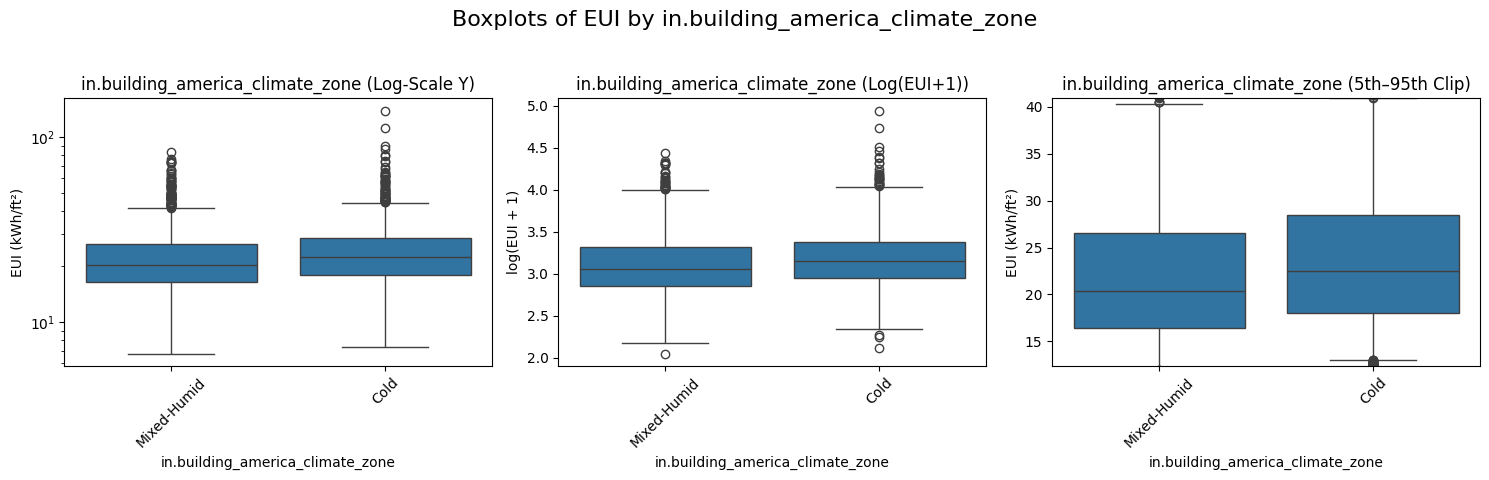

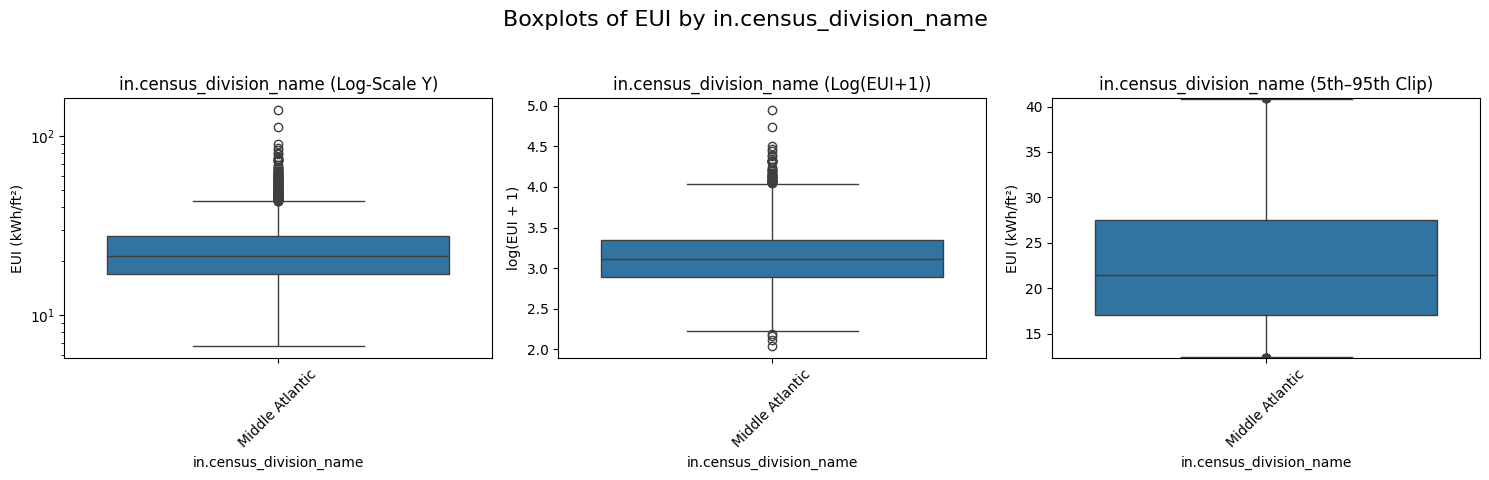

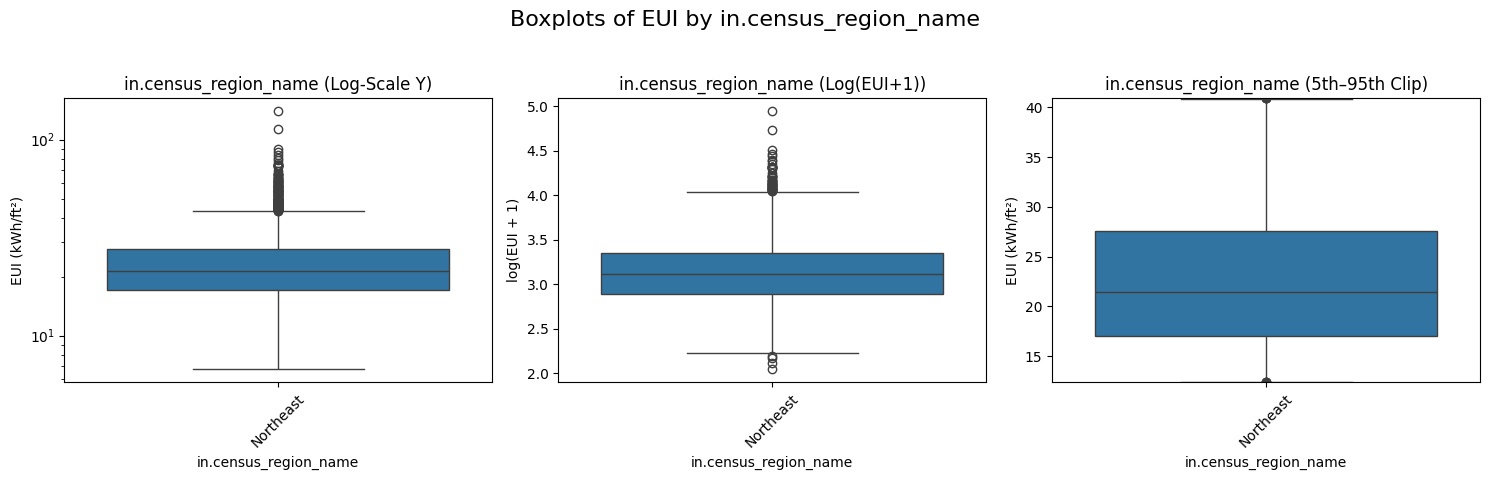

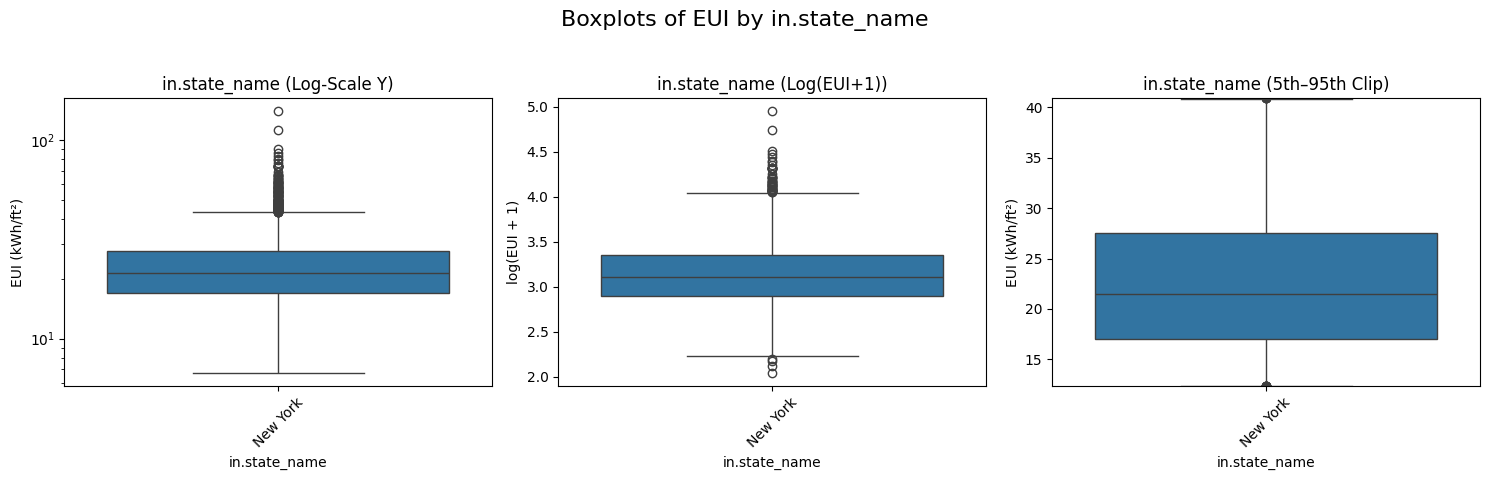

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
file_path = '/Users/georgepaul/Desktop/Research Project/Data Ideas/ComStock/Data/NY_baseline_metadata_and_annual_results (1).csv'
df = pd.read_csv(file_path)

# Example: Filter to only office building types if needed
allowed_types = ["SmallOffice", "MediumOffice", "LargeOffice"]
if 'in.comstock_building_type' in df.columns:
    df = df[df['in.comstock_building_type'].isin(allowed_types)]
    print("Filtered dataset shape:", df.shape)
else:
    print("Column 'in.comstock_building_type' not found; skipping filter.")

# Ensure we have an EUI column. If not, compute it:
if 'EUI' not in df.columns:
    if 'out.site_energy.total.energy_consumption' in df.columns and 'in.sqft' in df.columns:
        df['EUI'] = df['out.site_energy.total.energy_consumption'] / df['in.sqft']
    else:
        raise ValueError("Cannot find or compute 'EUI'—missing columns.")

# 2. Define Categorical Variables to Explore
cat_vars = [
    'in.building_america_climate_zone',
    'in.census_division_name',
    'in.census_region_name',
    'in.state_name',
    # Add more categorical columns here if available and relevant:
    # 'in.cluster_name', 'in.county_name', 'in.ashrae_iecc_climate_zone_2006', etc.
]

# 3. Function to Plot Three Boxplots for a Single Categorical Variable
def plot_boxplots_for_variable(df, cat_var, top_n=10):
    """
    Creates a figure with three subplots:
      1) Boxplot with log-scale y-axis
      2) Boxplot of log-transformed EUI
      3) Boxplot clipped to 5th–95th percentile of EUI

    :param df: DataFrame containing 'EUI' and the categorical variable
    :param cat_var: Name of the categorical column
    :param top_n: If cat_var has many categories, limit to the top_n categories by frequency
    """
    # Ensure the cat_var exists
    if cat_var not in df.columns:
        print(f"Column '{cat_var}' not found; skipping.")
        return

    # Drop rows where cat_var is missing
    data = df.dropna(subset=[cat_var, 'EUI']).copy()

    # If the variable has too many categories, keep only top_n
    unique_cats = data[cat_var].nunique()
    if unique_cats > top_n:
        top_categories = data[cat_var].value_counts().head(top_n).index
        data = data[data[cat_var].isin(top_categories)]
        print(f"{cat_var}: limited to top {top_n} categories out of {unique_cats} total.")

    # Prepare for subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
    fig.suptitle(f"Boxplots of EUI by {cat_var}", fontsize=16)

    # (A) Boxplot with Log-Scale Y-Axis
    sns.boxplot(x=cat_var, y='EUI', data=data, ax=axes[0])
    axes[0].set_title(f"{cat_var} (Log-Scale Y)", fontsize=12)
    axes[0].set_xlabel(cat_var, fontsize=10)
    axes[0].set_ylabel("EUI (kWh/ft²)", fontsize=10)
    # Apply log scale on the y-axis
    axes[0].set_yscale('log')
    axes[0].tick_params(axis='x', rotation=45)

    # (B) Boxplot of Log-Transformed EUI
    data['log_EUI'] = np.log1p(data['EUI'])  # log(EUI + 1)
    sns.boxplot(x=cat_var, y='log_EUI', data=data, ax=axes[1])
    axes[1].set_title(f"{cat_var} (Log(EUI+1))", fontsize=12)
    axes[1].set_xlabel(cat_var, fontsize=10)
    axes[1].set_ylabel("log(EUI + 1)", fontsize=10)
    axes[1].tick_params(axis='x', rotation=45)

    # (C) Boxplot Clipped to 5th–95th Percentiles
    p5, p95 = np.percentile(data['EUI'].dropna(), [5, 95])
    sns.boxplot(x=cat_var, y='EUI', data=data, ax=axes[2], whis=[5, 95])
    axes[2].set_ylim(p5, p95)  # Clip the y-axis
    axes[2].set_title(f"{cat_var} (5th–95th Clip)", fontsize=12)
    axes[2].set_xlabel(cat_var, fontsize=10)
    axes[2].set_ylabel("EUI (kWh/ft²)", fontsize=10)
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 4. Generate Plots for Each Categorical Variable
for var in cat_vars:
    plot_boxplots_for_variable(df, var, top_n=10)